In [ ]:
import numpy as np
import astropy
from astropy.table import Table, Column
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
import matplotlib.pyplot as plt

In [137]:
help_master = Table.read('../../../../../HELP/dmu_products/dmu32/dmu32_ELAIS-N1/data/ELAIS-N1_20171020.fits')
mask = ~np.isnan(help_master['f_suprime_g'])
ra = (help_master['ra']*u.degree).value
dec = (help_master['dec']*u.degree).value
c_help = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)

In [138]:
lofar_master = Table.read('data/MASTER_opt_spitzer_merged_lesscol.fits')
mask = lofar_master['FLUX_APER_hscg']>0.0
ra = (lofar_master['ALPHA_J2000']*u.degree).value
dec = (lofar_master['DELTA_J2000']*u.degree).value
c_lofar = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)

In [139]:
idx, d2d, d3d = match_coordinates_sky(c_lofar, c_help) 

In [140]:
col_help = Column(np.arange(0,len(help_master),1),name='xmatch_index')
help_master.add_column(col_help)
col_lofar = Column(idx,name='xmatch_index')
lofar_master.add_column(col_lofar)

In [141]:
joined = astropy.table.join(lofar_master,help_master,keys='xmatch_index',join_type='left')

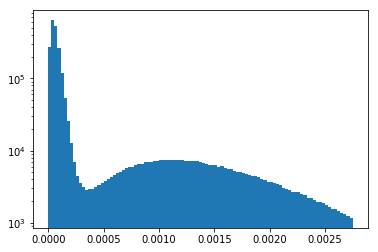

In [142]:
mask = ~np.isnan(d2d.value)
y = d2d[mask].value
bins = np.arange(0,10/3600,0.1/3600)
plt.hist(y,bins=bins,log=True)
plt.show()

In [39]:
mask = d2d.value <0.0004
np.sum(mask)/len(d2d)

0.7812925556863604

In [51]:
idx[1]

2017464

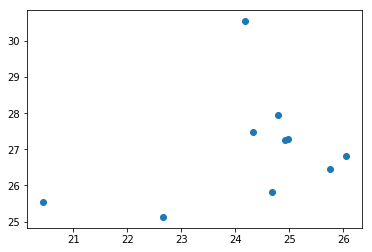

In [128]:
x = []
y = []
mask_help = ~np.isnan(help_master['f_suprime_g'])
mask_lofar1 = (lofar_master['FLUX_APER_hscg']>0.0).data[:,0]
mask_lofar2 = (d2d.value <0.0004) 
for n in range(10):
    x.append(help_master['m_suprime_g'][mask_help][idx[n]])
    y.append(lofar_master['FLUX_APER_hscg'][mask_lofar1][mask_lofar2][n][0])
x = np.array(x)
y = 30 - 2.5 * np.log10(np.array(y))
plt.scatter(x,y)
plt.show()

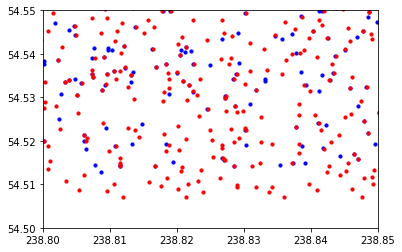

In [133]:
x = help_master['ra']
y = help_master['dec']
plt.scatter(x,y,s=10,color='blue')

x = lofar_master['ALPHA_J2000']
y = lofar_master['DELTA_J2000']
plt.scatter(x,y,s=10,color='red')

plt.xlim(238.8,238.85)
plt.ylim(54.5,54.55)
plt.show()

/its/home/im281/anaconda3/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/its/home/im281/anaconda3/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


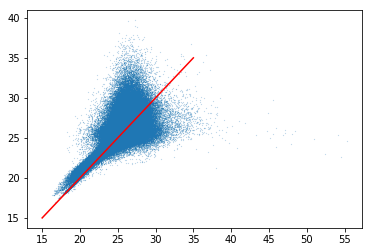

In [153]:
x = joined['m_suprime_g']
y = 30 - 2.5*np.log10(joined['FLUX_APER_hscg'][:,1])
plt.scatter(x,y,s=0.01)
plt.plot([15,35],[15,35],color='red')
plt.show()

/its/home/im281/anaconda3/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/its/home/im281/anaconda3/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


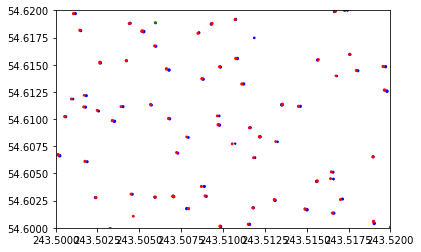

In [182]:
x = joined['ra']
y = joined['dec']
s = np.abs(30 - joined['m_suprime_g'])
plt.scatter(x,y,s=s,color='blue')

x = joined['ALPHA_J2000']
y = joined['DELTA_J2000']
s = np.abs(30 - (30 - 2.5*np.log10(joined['FLUX_APER_hscg'][:,1])))
plt.scatter(x,y,s=s,color='red')

mask = ~np.isnan(joined['f_spire_250'])
x = joined['ra'][mask]
y = joined['dec'][mask]
s = np.abs(30 - joined['m_suprime_g'])
plt.scatter(x,y,s=s,color='green')

plt.xlim(243.5,243.52)
plt.ylim(54.6,54.62)
plt.show()

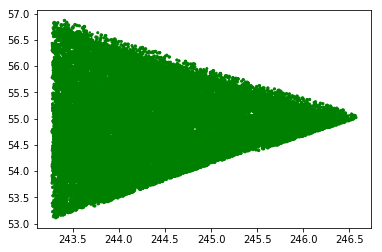

In [181]:
mask = ~np.isnan(joined['f_spire_250'])
x = joined['ra'][mask]
y = joined['dec'][mask]
s = np.abs(30 - joined['m_suprime_g'])
plt.scatter(x,y,s=s,color='green')

plt.show()

In [162]:
mask = d2d.value<0.0004
joined[mask]

NUMBER,FLUX_APER_i [8],FLUXERR_APER_i [8],SNR_WIN,BACKGROUND,FLUX_MAX,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,X2_IMAGE,Y2_IMAGE,XY_IMAGE,X2_WORLD,Y2_WORLD,A_IMAGE,B_IMAGE,THETA_IMAGE,ERRA_IMAGE,ERRB_IMAGE,ERRTHETA_IMAGE,FLAGS,FLUX_APER_J [8],FLUXERR_APER_J [8],FLUX_APER_K [8],FLUXERR_APER_K [8],FLUX_APER_g [8],FLUXERR_APER_g [8],FLUX_APER_hscg [8],FLUXERR_APER_hscg [8],FLUX_APER_hsci [8],FLUXERR_APER_hsci [8],FLUX_APER_hscnb921 [8],FLUXERR_APER_hscnb921 [8],FLUX_APER_hscr [8],FLUXERR_APER_hscr [8],FLUX_APER_hscy [8],FLUXERR_APER_hscy [8],FLUX_APER_hscz [8],FLUXERR_APER_hscz [8],FLUX_APER_r [8],FLUXERR_APER_r [8],FLUX_APER_se1 [8],FLUXERR_APER_se1 [8],FLUX_APER_se2 [8],FLUXERR_APER_se2 [8],FLUX_APER_sw1 [8],FLUXERR_APER_sw1 [8],FLUX_APER_sw2 [8],FLUXERR_APER_sw2 [8],FLUX_APER_sw3 [8],FLUXERR_APER_sw3 [8],FLUX_APER_sw4 [8],FLUXERR_APER_sw4 [8],FLUX_APER_u [8],FLUXERR_APER_u [8],FLUX_APER_y [8],FLUXERR_APER_y [8],FLUX_APER_z [8],FLUXERR_APER_z [8],flag_clean,NUMBER_OPTICAL,NUMBER_SPITZER,xmatch_index,help_id,field,ra,dec,hp_idx,ebv,redshift,zspec,f_wfc_u,ferr_wfc_u,f_ap_wfc_u,ferr_ap_wfc_u,m_wfc_u,merr_wfc_u,m_ap_wfc_u,merr_ap_wfc_u,flag_wfc_u,f_megacam_u,ferr_megacam_u,f_ap_megacam_u,ferr_ap_megacam_u,m_megacam_u,merr_megacam_u,m_ap_megacam_u,merr_ap_megacam_u,flag_megacam_u,f_suprime_g,ferr_suprime_g,f_ap_suprime_g,ferr_ap_suprime_g,m_suprime_g,merr_suprime_g,m_ap_suprime_g,merr_ap_suprime_g,flag_suprime_g,f_megacam_g,ferr_megacam_g,f_ap_megacam_g,ferr_ap_megacam_g,m_megacam_g,merr_megacam_g,m_ap_megacam_g,merr_ap_megacam_g,flag_megacam_g,f_gpc1_g,ferr_gpc1_g,f_ap_gpc1_g,ferr_ap_gpc1_g,m_gpc1_g,merr_gpc1_g,m_ap_gpc1_g,merr_ap_gpc1_g,flag_gpc1_g,f_wfc_g,ferr_wfc_g,f_ap_wfc_g,ferr_ap_wfc_g,m_wfc_g,merr_wfc_g,m_ap_wfc_g,merr_ap_wfc_g,flag_wfc_g,f_suprime_r,ferr_suprime_r,f_ap_suprime_r,ferr_ap_suprime_r,m_suprime_r,merr_suprime_r,m_ap_suprime_r,merr_ap_suprime_r,flag_suprime_r,f_gpc1_r,ferr_gpc1_r,f_ap_gpc1_r,ferr_ap_gpc1_r,m_gpc1_r,merr_gpc1_r,m_ap_gpc1_r,merr_ap_gpc1_r,flag_gpc1_r,f_wfc_r,ferr_wfc_r,f_ap_wfc_r,ferr_ap_wfc_r,m_wfc_r,merr_wfc_r,m_ap_wfc_r,merr_ap_wfc_r,flag_wfc_r,f_megacam_r,ferr_megacam_r,f_ap_megacam_r,ferr_ap_megacam_r,m_megacam_r,merr_megacam_r,m_ap_megacam_r,merr_ap_megacam_r,flag_megacam_r,f_gpc1_i,ferr_gpc1_i,f_ap_gpc1_i,ferr_ap_gpc1_i,m_gpc1_i,merr_gpc1_i,m_ap_gpc1_i,merr_ap_gpc1_i,flag_gpc1_i,f_suprime_i,ferr_suprime_i,f_ap_suprime_i,ferr_ap_suprime_i,m_suprime_i,merr_suprime_i,m_ap_suprime_i,merr_ap_suprime_i,flag_suprime_i,f_wfc_i,ferr_wfc_i,f_ap_wfc_i,ferr_ap_wfc_i,m_wfc_i,merr_wfc_i,m_ap_wfc_i,merr_ap_wfc_i,flag_wfc_i,f_gpc1_z,ferr_gpc1_z,f_ap_gpc1_z,ferr_ap_gpc1_z,m_gpc1_z,merr_gpc1_z,m_ap_gpc1_z,merr_ap_gpc1_z,flag_gpc1_z,f_wfc_z,ferr_wfc_z,f_ap_wfc_z,ferr_ap_wfc_z,m_wfc_z,merr_wfc_z,m_ap_wfc_z,merr_ap_wfc_z,flag_wfc_z,f_megacam_z,ferr_megacam_z,f_ap_megacam_z,ferr_ap_megacam_z,m_megacam_z,merr_megacam_z,m_ap_megacam_z,merr_ap_megacam_z,flag_megacam_z,f_suprime_z,ferr_suprime_z,f_ap_suprime_z,ferr_ap_suprime_z,m_suprime_z,merr_suprime_z,m_ap_suprime_z,merr_ap_suprime_z,flag_suprime_z,f_suprime_n921,ferr_suprime_n921,f_ap_suprime_n921,ferr_ap_suprime_n921,m_suprime_n921,merr_suprime_n921,m_ap_suprime_n921,merr_ap_suprime_n921,flag_suprime_n921,f_gpc1_y,ferr_gpc1_y,f_ap_gpc1_y,ferr_ap_gpc1_y,m_gpc1_y,merr_gpc1_y,m_ap_gpc1_y,merr_ap_gpc1_y,flag_gpc1_y,f_suprime_y,ferr_suprime_y,f_ap_suprime_y,ferr_ap_suprime_y,m_suprime_y,merr_suprime_y,m_ap_suprime_y,merr_ap_suprime_y,flag_suprime_y,f_ukidss_j,ferr_ukidss_j,f_ap_ukidss_j,ferr_ap_ukidss_j,m_ukidss_j,merr_ukidss_j,m_ap_ukidss_j,merr_ap_ukidss_j,flag_ukidss_j,f_ukidss_k,ferr_ukidss_k,f_ap_ukidss_k,ferr_ap_ukidss_k,m_ukidss_k,merr_ukidss_k,m_ap_ukidss_k,merr_ap_ukidss_k,flag_ukidss_k,f_irac_i1,ferr_irac_i1,f_ap_irac_i1,ferr_ap_irac_i1,m_irac_i1,merr_irac_i1,m_ap_irac_i1,merr_ap_irac_i1,flag_irac_i1,f_irac_i2,ferr_irac_i2,f_ap_irac_i2,ferr_ap_irac_i2,m_irac_i2,merr_irac_i2,m_ap_irac_i2,merr_ap_irac_i2,flag_irac_i2,f_irac_i3,ferr_irac_i3,f_ap_irac_i3,ferr_a

In [163]:
1/3600

0.0002777777777777778